## Unit 7 Code


## Question #1 

Natural cork in wine bottles is subject to deterioration, and as a result wine in such bottles may experience contamination. 

The article “Effects of Bottle Closure Type on Consumer Perceptions of Wine Quality” (Amer. J. of Enology and Viticulture, 2007: 182–191) reported that, in a tasting of commercial chardonnays, 16 of 91 bottles were considered spoiled to some extent by cork-associated characteristics.

Does this data provide strong evidence for concluding that more than 15% of all such bottles are contaminated in this way?  Use a significance level equal to 0.10.


In [1]:
n = 91; p_hat = 16/n; p = 0.15;
t = (p_hat - p)/sqrt(p*(1-p)/n)
p_value = 1 - pnorm(t)
t
p_value

[1] 0.6899094

[1] 0.2451256

## Question #2

(a) Consider the test $H_0: \mu = 0$ vs $H_1: \mu = 0.8$. Simulate a $m = 10,000$ samples of size $n = 5$ under the null hypothesis. Fix $\sigma = 1$ and assume that it is known. (You can copy this code from Unit #6 exercises.)

In [2]:
m = 10000; n = 5;
x_null = matrix(rnorm(m*n, mean = 0, sd = 1), ncol = n)


(b) Calculate the p-value for each sample (remember, the p-value is calculated assuming the null hypothsis is true). Print a histogram of these p-values. What does the distribution look like?

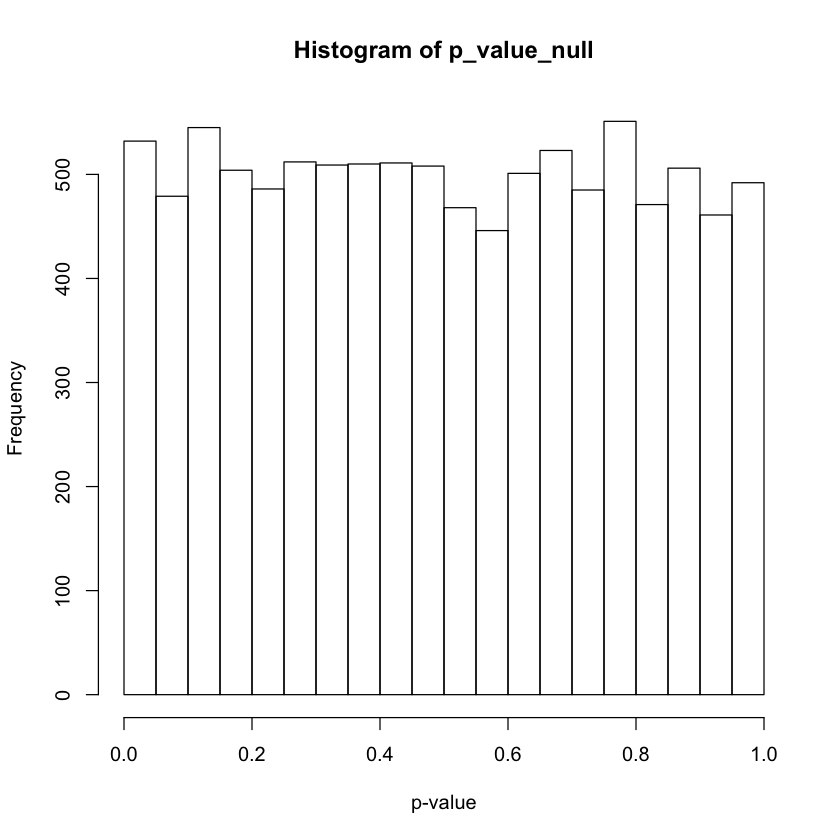

In [10]:
x_bar_null = rowMeans(x_null); s_null = apply(x_null, 1,sd); 

z_null = x_bar_null/(1/sqrt(n))
p_value_null = (1-pnorm(z_null))
hist(p_value_null, xlab = "p-value")

(c) Suppose $\alpha = 0.05$. What is the percentage of p-values that are less than 0.05? How often, in this scenario, would you make a type I error? Does the answer that theory suggests match (roughly) the answer the simulation suggests?

In [4]:
prop_null = sum(p_value_null < 0.05)/m
print(prop_null)

[1] 0.1024


(d) Now, considering the same test, i.e.,  $H_0: \mu = 0$ vs. $H_1: \mu = 0.8$, simulate data under the alternative. Calculate the p-values for each sample (remember, the p-value is calculated assuming the null hypothsis is true). Print a histogram of these p-values. What does the distribution look like?

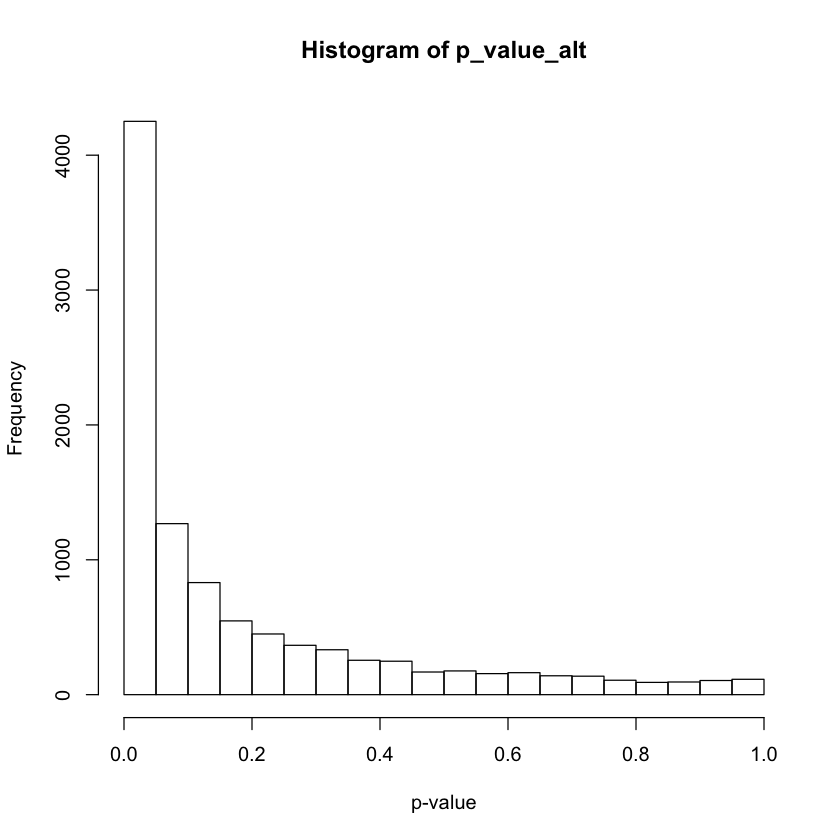

In [5]:
mu_alt = 0.8
x_alt = matrix(rnorm(m*n, mean = mu_alt, sd = 1), ncol = n)

x_bar_alt = rowMeans(x_alt); s_alt = apply(x_alt, 1,sd); 

z_alt = x_bar_alt/(1/sqrt(n))
p_value_alt = 2*(1-pnorm(abs(z_alt)))
hist(p_value_alt, xlab = "p-value")

(e) Suppose $\alpha = 0.05$. What is the percentage of p-values that are greater than 0.05? How often, in this scenario, would you make a type II error?

In [6]:
prop_alt = sum(p_value_alt > 0.05)/m
print(prop_alt)

[1] 0.5749


(f) The ${\bf power}$ of a test is $1 - P(\text{Type II Error})$. That is, the power of a hypothesis test is the probability of rejecting $H_0$ when $H_1$ is true. (High powered tests are desirable!) Calculate the power of this test.

In [7]:
power = 1 - prop_alt
print(power)

[1] 0.4251


(g) How could you increase the power of the test? Verify your answer through simulation by changing values from above.

If we increase the sample size $n$, the power will increase. Also, if the value of $\mu$ under the alternative hypothesis were further than the value of $\mu$ under the null, the power would be higher. (To see these differences, change $n = 5$ to $n = 15$ or change mu_alt from 0.8 to 2 (for example).)

## Question #3



Analysis of a random sample consisting of 20 specimens of cold-rolled steel to determine yield strengths resulted in a sample average strength of 29.8 ksi. A second random sample of 25 two-sided galvanized steel specimens gave a sample average strength of 34.7 ski.

Assuming that the two yield-strength distributions are normal with $\sigma_1 = 4.0$ and $\sigma_2 = 5.0$, does the data indicate that the corresponding true average yield strengths $\mu_1$ and $\mu_2$ are different? 

Conduct the test at significance level  $\alpha = 0.01$.


### Note that H_0: $\mu_1 - \mu_2 = 0$,  H_1: $\mu_1 - \mu_2 \ne 0$. This is a two-tailed test.

In [8]:
n1 = 20; x_bar = 29.8; n2 = 25; y_bar = 34.7; sigma1 = 4; sigma2 = 5;

z = (x_bar-y_bar)/sqrt(sigma1^2/n1 + sigma2^2/n2);

p = 2*(1 - pnorm(abs(z))); 
p

[1] 0.0002599583

## Question #4

Simulate random numbers from an F-distribution with $v_1 = 30$ and $v_2 = 15$. Overlay the theoretical probability distribution. What is the F distribution used to test?

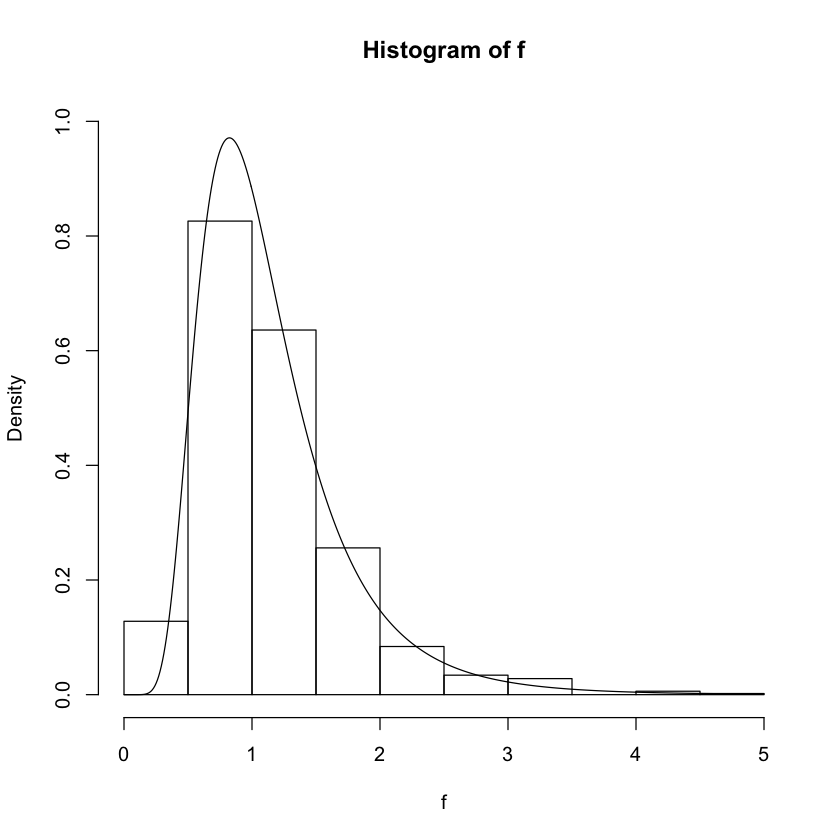

In [9]:
v1 = 30; v2 = 15;

f = rf(1000,v1,v2)
x = seq(0.001,5, length.out = 500)
y = df(x,v1,v2)
hist(f, freq = FALSE, ylim = c(0,1))
lines(x,y)